# `clust-learn` - Module 4: Classifier 分类

This guide shows how to use the `classifier` module of the `clust-learn` package to fit a classification model to further explain the clustres previously obtained.

本指南展示了如何使用clust-learn包中的classifier模块来拟合一个分类模型，以进一步解释之前获得的聚类。

Note this module can also be used independently to fit a classification model for data that is not necessarily the output of clustering.

注意，这个模块也可以独立使用，用于拟合一个分类模型，数据不一定是聚类的输出。

## 0. Setup

In [164]:
import numpy as np
import pandas as pd

from clearn.classifier import Classifier

pd.set_option('display.max_columns', None)

## 1. Data loading

Original dataset with corresponding cluster labels.

包含相应聚类标签的原始数据集。

In [165]:
df = pd.read_csv('data2/ATG_modified_preprocessed_clustered_output.csv')
df.head()

,LINK_index,ATBG01,ATBR01A,ATBR01B,ATBR02A,ATBR02B,ATBR04,ATBR05,ATBGEAS,ATBGSOS,ATBGTJS,ATBGSLI,ATDGLIHY,ATDGRIHY,ITLANG_TQ,LCID_TQ,ATBG02,ATBG03,ATBG04,ATBG05AA,ATBG05AB,ATBG05AC,ATBG05AD,ATBG05BA,ATBG05BB,ATBG05BC,ATBG05BD,ATBG05BE,ATBG05BF,ATBG05BG,ATBG05BH,ATBG05BI,ATBG05BJ,ATBG05BK,ATBG06,ATBG07AA,ATBG07BA,ATBG07AB,ATBG07BB,ATBG07AC,ATBG07BC,ATBG07AD,ATBG07BD,ATBG07AE,ATBG07BE,ATBG07AF,ATBG07BF,ATBG07AG,ATBG07BG,ATBG08A,ATBG08B,ATBG08C,ATBG08D,ATBG08E,ATBG09A,ATBG09B,ATBG09C,ATBG09D,ATBG10A,ATBG10B,ATBG10C,ATBG10D,ATBG10E,ATBG10F,ATBG10G,ATBG10H,ATBG10I,ATBG10J,ATBG10K,ATBG10L,ATBG11A,ATBG11B,ATBG11C,ATBG11D,ATBG11E,ATBG11F,ATBG11G,ATBG11H,ATBG11I,ATBG12A,ATBG12B,ATBG12C,ATBG12D,ATBG12E,ATBG12F,ATBR03A,ATBR03B,ATBR03C,ATBR03D,ATBR03E,ATBR03F,ATBR03G,ATBR03H,ATBR06A,ATBR06B,ATBR06C,ATBR06D,ATBR06E,ATBR07AA,ATBR07AB,ATBR07AC,ATBR07AD,ATBR07BA,ATBR07BB,ATBR07BC,ATBR07BD,ATBR08A,ATBR08B,ATBR08C,ATBR08D,ATBR08E,ATBR08F,ATBR08G,ATBR08H,ATBR09A,ATBR09B,ATBR09C,ATBR09D,ATBR09E,ATBR09F,ATBR09G,ATBR09H,ATBR09I,ATBR10A,ATBR10B,ATBR10C,ATBR10D,ATBR10E,ATBR10F,ATBR10G,ATBR10H,ATBR10I,ATBR10J,ATBR10K,ATBR10L,ATBR11A,ATBR11B,ATBR11C,ATBR11D,ATBR11E,ATBR12A,ATBR12BA,ATBR12BB,ATBR12BC,ATBR12BD,ATBR12C,ATBR12DA,ATBR12DB,ATBR12DC,ATBR12EA,ATBR12EB,ATBR12EC,ATBR12ED,ATBR12EE,ATBR13A,ATBR13B,ATBR13C,ATBR13D,ATBR13E,ATBR14,ATBR15,ATBR16,ATBR17A,ATBR17B,ATBR17C,ATBR18A,ATBR18B,ATBR18C,ATBR18D,ATBR18E,ATBR19,ATDGEAS,ATDGSOS,ATDGTJS,ATDGSLI,cluster,cluster_cat
0,44650015001011500101014,32.0,34.0,34.0,1,8.0,280.0,90.0,9.44107,13.68150,8.67953,10.27928,182.0,58.50000,10,5124,1,5.0,4,1,2,2,1,3,2,3,3,2,3,2,2,2,3,2,3,1,1,2,1,2,1,2,1,2,2,1,1,1,1,1,2,1,1,2,2,3,2,1,2,2,2,2,2,3,3,3,3,2,3,2,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,1,2,2,1,2,1,2,2,4,4,3,2,1,3,4,2,1,3,3,3,2,2,2,2,2,3,3,3,1,3,1,1,1,1,2,2,2,2,2,2,2,2,2,3,3,2,3,3,3,2,2,3,3,4,2,2,2,2,2,4,3,3,3,4,4,4,4,4,1,3,3,1,1,4,5,3,1,2,1,1,1,2,1,1,5,2,1,2,2,2,TEA_2
1,44650015001033500103034,26.0,25.0,25.0,1,8.0,280.0,60.0,9.44107,11.59162,8.01840,10.90415,182.0,39.00000,10,5124,1,5.0,4,1,2,2,1,3,3,3,3,2,3,3,3,3,2,3,1,1,1,1,3,1,2,1,2,1,2,1,1,1,1,1,2,1,2,2,2,3,2,2,2,2,2,2,2,3,3,2,4,2,3,2,1,1,1,1,1,1,1,1,3,2,2,2,2,3,2,2,1,2,1,2,2,1,1,3,3,2,2,2,1,2,3,4,3,3,1,2,1,1,2,1,1,2,3,3,2,2,2,2,2,4,2,3,3,1,2,1,1,2,2,2,2,2,2,3,3,2,2,2,2,2,2,2,2,2,2,4,3,3,3,4,4,4,4,4,1,4,4,1,1,3,3,2,1,2,2,2,2,2,1,1,5,2,1,2,1,2,TEA_2
2,44650025002011500201014,7.0,29.0,29.0,10,10.0,360.0,40.0,9.44107,8.99685,10.39017,9.68037,235.2,26.13333,1,10333,1,2.0,5,1,2,1,2,3,2,2,2,2,2,2,2,2,1,1,2,1,1,2,2,1,1,2,1,2,1,1,1,1,2,1,2,2,1,2,1,2,2,1,2,3,3,2,2,2,3,3,3,2,2,2,1,1,2,2,2,2,2,2,2,1,1,1,2,3,1,2,2,1,1,2,2,1,3,2,1,1,3,2,2,3,2,3,2,3,2,2,1,1,2,2,1,2,2,2,3,3,3,3,2,3,2,3,3,3,3,3,2,2,2,3,3,3,3,3,4,3,2,2,2,3,2,2,2,2,2,4,3,3,3,4,4,4,4,4,2,1,1,4,2,2,2,2,2,1,2,1,2,2,2,1,5,2,2,1,2,2,TEA_2
3,44650045004011500401014,7.0,27.0,27.0,2,2.0,240.0,40.0,8.83963,10.40627,8.67953,8.54995,159.2,26.53333,10,5124,1,3.0,5,2,2,1,2,3,3,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,1,1,1,2,1,2,1,2,2,2,2,2,2,2,2,2,2,2,3,3,3,3,3,3,3,1,1,1,2,2,2,2,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,4,4,3,1,3,3,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,1,2,1,2,2,2,2,2,2,3,3,3,3,4,1,2,2,2,2,2,2,2,1,1,1,1,1,2,2,1,5,3,1,2,2,3,TEA_3
4,44650045004033500403034,5.0,27.0,27.0,8,10.0,90.0,20.0,9.44107,12.35702,9.27422,5.31576,59.7,13.26667,10,5124,2,3.0,5,1,2,2,1,3,2,3,3,2,3,2,2,2,1,2,3,1,1,2,1,2,2,2,1,1,2,1,1,1,2,1,2,1,1,2,2,3,2,2,2,2,3,2,2,2,3,3,3,2,2,3,1,2,1,1,1,1,1,1,1,2,2,2,1,2,2,2,3,3,3,2,3,3,3,3,3,4,3,2,3,3,4,3,3,4,4,4,2,2,2,1,1,3,2,3,3,3,2,3,3,3,3,3,3,3,2,3,2,3,3,3,4,3,3,3,4,3,3,3,4,4,2,2,2,2,2,4,3,3,3,4,4,4,4,4,1,2,2,1,1,2,2,2,1,2,1,1,1,2,2,1,5,2,1,2,3,2,TEA_2


Lower dimensional dataset with corresponding cluster labels.

包含相应聚类标签的降维数据集。


In [166]:
df_red = pd.read_csv('data2/ATG_modified_preprocessed_dim_red_clustered_output.csv')
df_red.head()

,dim_01,dim_02,dim_03,dim_04,dim_05,dim_06,dim_07,dim_08,dim_09,dim_10,dim_11,dim_12,dim_13,dim_14,dim_15,dim_16,dim_17,dim_18,dim_19,dim_20,dim_21,cluster,cluster_cat
0,-0.056482,-0.721404,1.233218,0.795064,1.152711,-0.209143,-0.159366,1.727788,-0.014080,-0.276881,-0.016079,-0.122503,0.083247,-0.024309,-0.023945,-0.231236,0.063242,0.100367,-0.084057,0.097490,-0.284776,2,TEA_2
1,-0.030385,-1.097853,-0.956710,0.186633,1.188671,-0.569533,0.174160,1.116346,0.063752,-0.135699,-0.005542,-0.318247,0.176199,-0.055006,0.064595,-0.238356,-0.103038,0.260814,-0.054351,0.133467,-0.135534,2,TEA_2
2,0.964304,-1.347523,0.018861,-0.646950,3.565128,0.183876,-0.367158,-0.819889,-0.241497,-0.143351,-0.097439,-0.076139,0.398982,-0.034871,0.246152,-0.086512,0.119613,-0.082925,-0.046257,-0.083449,0.077213,2,TEA_2
3,-0.464942,-1.343632,-0.466541,-0.514044,-0.125213,-0.360863,-0.910660,-0.819889,-0.508603,0.224474,-0.314108,0.439784,0.437004,-0.050410,0.275547,0.110057,0.002768,-0.305471,0.034562,0.417313,-0.268855,3,TEA_3
4,-2.277013,-1.597192,-0.468121,0.327881,2.925651,-0.066411,-2.723636,-1.023703,-0.296828,-0.290138,0.045741,0.506085,0.299632,-0.360958,0.050119,-0.389126,0.141657,0.041566,-0.049508,0.145144,-0.109272,2,TEA_2


## 2. Classification using extracted components from dimensionality reduction as predictors

使用降维技术提取的成分作为预测变量进行分类

### 2.1. Class instantiation and model fitting 类实例化和模型拟合

In [167]:
# 使用降维后的数据初始化分类器。
# 参数：
# df_red：降维后的数据集。
# list(df_red.columns[:-2])：使用数据集中除最后两列以外的所有列作为特征。
# df_red['cluster']：目标变量（聚类标签）。
# num_cols：指定数值特征。

classifier = Classifier(df_red, list(df_red.columns[:-2]),  df_red['cluster'], num_cols=list(df_red.columns[:-2]))

In [168]:
np.random.seed(42)

In [169]:
# 训练分类模型，并进行超参数调优。
# 参数：
# hyperparameter_tuning=True：启用超参数调优。
# param_grid：指定超参数搜索空间，包括：
# n_estimators：树的数量。
# eta：学习率。
# max_depth：树的最大深度。

classifier.train_model(hyperparameter_tuning=True, param_grid=dict(n_estimators=[30, 60], eta=[0.15, 0.25], max_depth=[3, 5, 7, 9]))

2025-04-06 23:35:20 INFO     clearn.classifier.classifier: Running feature selection...
2025-04-06 23:35:27 INFO     clearn.classifier.classifier: Running hyperparameter tuning...
2025-04-06 23:35:28 INFO     clearn.classifier.classifier: Training model...
2025-04-06 23:35:28 INFO     clearn.classifier.classifier: DONE!


### 模型性能评估

In [170]:
# 查看模型中每个特征的重要性。
classifier.feature_importances

,variable_name,shap_importance
0,dim_03,0.707497
1,dim_02,0.703300
2,dim_05,0.628541
3,dim_04,0.620277
4,dim_07,0.394743
5,dim_06,0.387340
6,dim_01,0.309938
7,dim_10,0.199242
8,dim_17,0.195917
9,dim_11,0.176708


In [171]:
# 查看经过特征选择后保留的特征数量。
len(classifier.filtered_features_)

12

### 2.2. Model performance 模型性能 超参数调优结果

In [172]:
# 查看超参数调优的结果，包括最佳参数和对应的性能指标。
classifier.hyperparameter_tuning_metrics()

XGBClassifier Hyperparameters                        Performance metrics  \
                             eta max_depth n_estimators     mean_test_score   
0                           0.15         3           30            0.798546   
1                           0.15         3           60            0.828849   
2                           0.15         5           30            0.802290   
3                           0.15         5           60            0.825061   
4                           0.15         7           30            0.813610   
5                           0.15         7           60            0.828849   
6                           0.15         9           30            0.809866   
7                           0.15         9           60            0.828849   
8                           0.25         3           30            0.825061   
9                           0.25         3           60            0.847832   
10                          0.25         5           30            0.813654   
11                          0.25         5           60            0.817485   
12                          0.25         7           30            0.802334   
13                          0.25         7           60            0.836468   
14                          0.25         9           30            0.813654   
15                          0.25         9           60            0.836425   

                   
   std_test_score  
0        0.043557  
1        0.051822  
2        0.032515  
3        0.046823  
4        0.044199  
5        0.033704  
6        0.041919  
7        0.042716  
8        0.037651  
9        0.035490  
10       0.019631  
11       0.018583  
12       0.047401  
13       0.037641  
14       0.065264  
15       0.044159

In [173]:
# 查看训练好的模型对象。
classifier.model_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.25, eval_metric='auc',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=60,
              n_jobs=None, num_parallel_tree=None, ...)

In [174]:
# # 获取训练集中的所有类别
# all_classes = classifier.df['cluster'].unique()

In [175]:
# 查看模型在测试集上的混淆矩阵。
classifier.confusion_matrix()

Predicted values                                          \
                                 0    1         2       3     5          6   
Observed values 0              7.0  0.0  0.000000   0.000  0.00   0.000000   
                1              0.0  7.0  0.000000   0.000  0.00   1.000000   
                2              0.0  0.0  5.000000   0.000  0.00   0.000000   
                3              0.0  0.0  1.000000  21.000  0.00   1.000000   
                5              0.0  0.0  0.000000   0.000  6.00   0.000000   
                6              0.0  0.0  0.000000   3.000  2.00  12.000000   
precision                      1.0  1.0  0.833333   0.875  0.75   0.857143   

                     recall  
                             
Observed values 0  1.000000  
                1  0.875000  
                2  1.000000  
                3  0.913043  
                5  1.000000  
                6  0.705882  
precision          0.878788

### 2.2. Model performance 模型性能 超参数调优结果

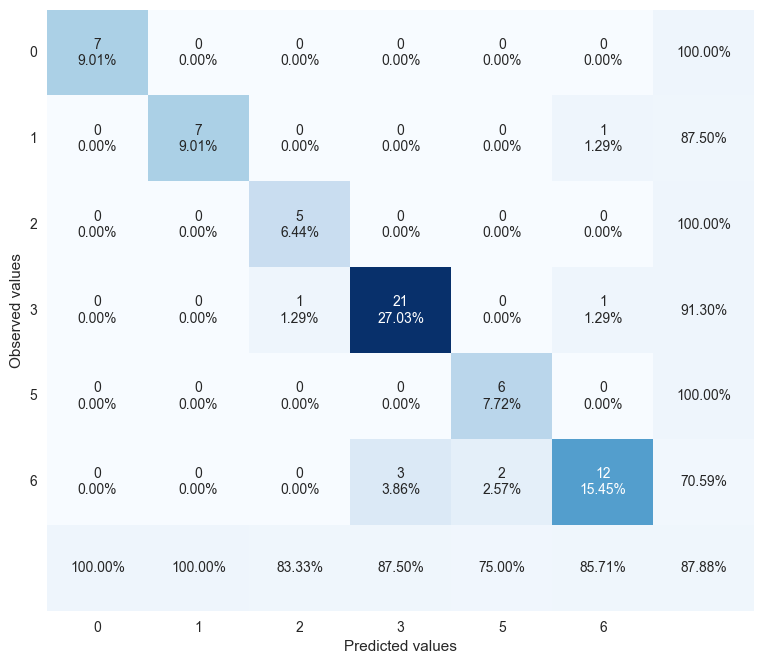

In [176]:
# 绘制混淆矩阵的可视化图表。
classifier.plot_confusion_matrix()

In [177]:
# 查看模型在测试集上的混淆矩阵。
classifier.confusion_matrix(test=False)

Predicted values                               recall
                                 0     1     2     3     5     6       
Observed values 0             23.0   0.0   0.0   0.0   0.0   0.0    1.0
                1              0.0  39.0   0.0   0.0   0.0   0.0    1.0
                2              0.0   0.0  28.0   0.0   0.0   0.0    1.0
                3              0.0   0.0   0.0  78.0   0.0   0.0    1.0
                5              0.0   0.0   0.0   0.0  37.0   0.0    1.0
                6              0.0   0.0   0.0   0.0   0.0  58.0    1.0
precision                      1.0   1.0   1.0   1.0   1.0   1.0    1.0

In [178]:
# 查看分类报告，包括精确率（precision）、召回率（recall）和 F1 分数。
classifier.classification_report()

,precision,recall,f1-score,support
0,1.000000,1.000000,1.000000,7.000000
1,1.000000,0.875000,0.933333,8.000000
2,0.833333,1.000000,0.909091,5.000000
3,0.875000,0.913043,0.893617,23.000000
4,0.750000,1.000000,0.857143,6.000000
5,0.857143,0.705882,0.774194,17.000000
accuracy,0.878788,0.878788,0.878788,0.878788
macro avg,0.885913,0.915654,0.894563,66.000000
weighted avg,0.884289,0.878788,0.876810,66.000000


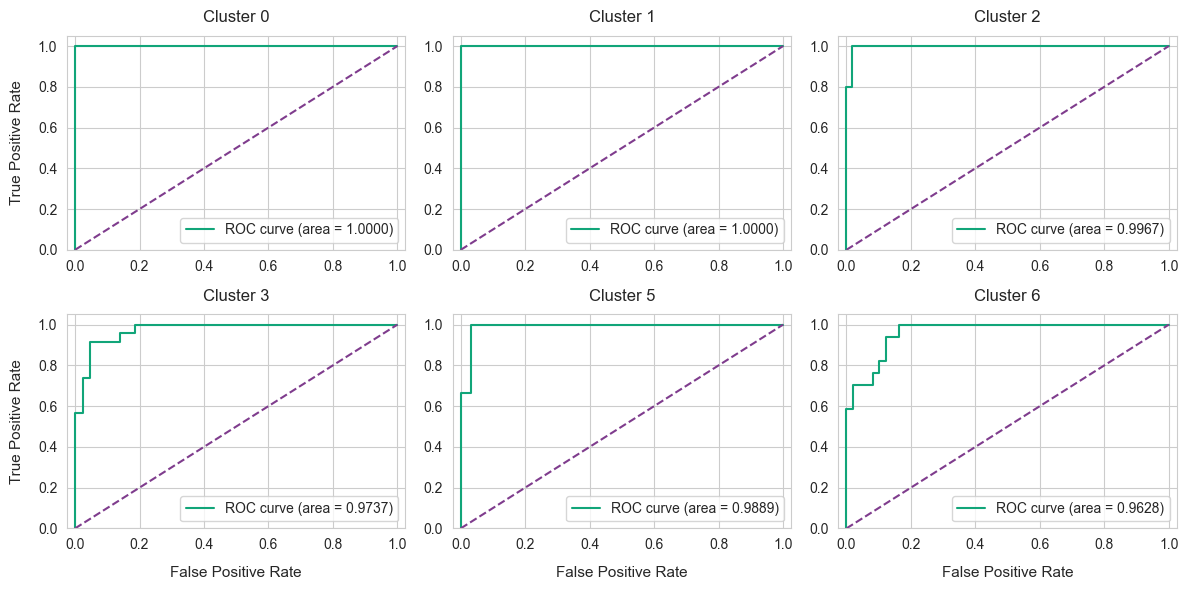

In [179]:
# 绘制模型的 ROC 曲线，评估分类性能
classifier.plot_roc_curves()

### 2.3. Model explainability 模型可解释性

#### 2.3.1. Global feature importance 全局特征重要性

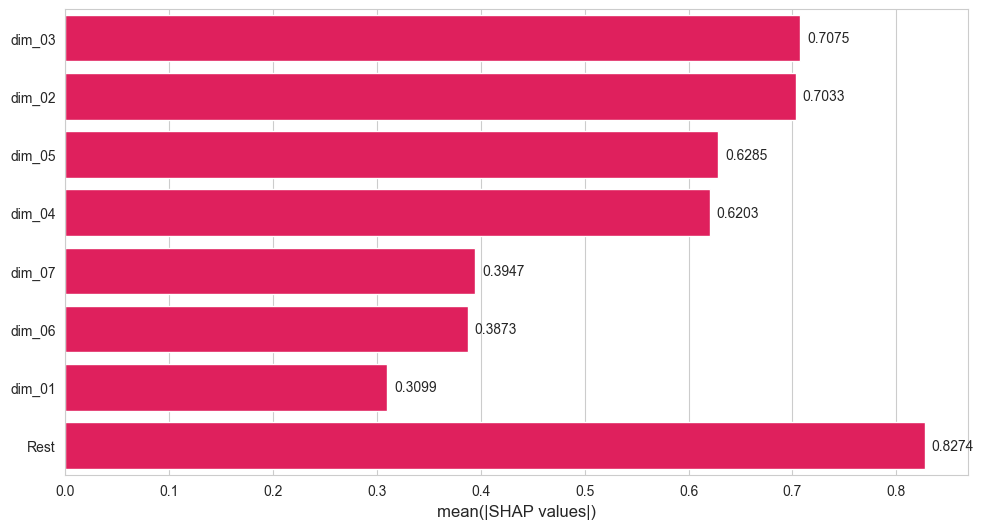

In [180]:
# 使用 SHAP（SHapley Additive exPlanations）方法绘制全局特征重要性。
classifier.plot_shap_importances()

#### 2.3.2. Detailed feature importance by class (cluster label)

按类别（聚类标签）的详细特征重要性。

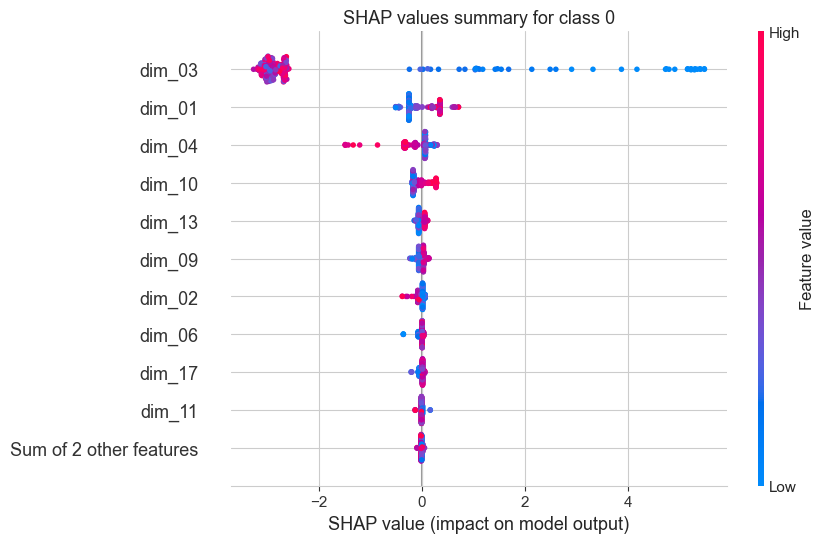

In [181]:
# 使用 SHAP 方法绘制指定类别（如 class_id=0）的特征重要性。
classifier.plot_shap_importances_beeswarm(class_id=0) #, output_path='PATH.jpg')

## Reproduciblity check 可重复性检查。

In [182]:
# 导出预测结果 使用训练好的模型对数据进行预测，并将结果保存到 CSV 文件中。
final = classifier.df[classifier.filtered_features_ + ['cluster']].copy()
final['cluster_pred'] = classifier.model_.predict(classifier.df[classifier.filtered_features_])
final.to_csv('data2/ATG_modified_dimred_vars_classification_output.csv', index=False)

In [183]:
# 比较预测结果 加载参考结果，并与当前结果进行比较，检查维度和预测是否一致。
df_ref = pd.read_csv('data2/ATG_modified_dimred_vars_classification_output.csv')

print('Diff in dimension', np.abs(df_ref.shape[1] - final.shape[1]))
print('Diff in prediction', (df_ref['cluster_pred'] != final['cluster_pred']).sum())

Diff in dimension 0
Diff in prediction 0


## 3. Classification using the original variables as predictors

使用原始变量作为预测因子进行分类。

First, we separate numerical from categorical variables.

首先，我们将数值变量与分类变量区分开来。

In [184]:
num_vars = ['ATBG01', 'ATBR01A', 'ATBR01B', 'ATBR02A', 'ATBR02B', 
            'ATBR04', 'ATBR05', 'ATBGEAS', 'ATBGSOS', 'ATBGTJS', 'ATBGSLI', 'ATDGLIHY', 'ATDGRIHY']
cat_vars = ['ITLANG_TQ', 'LCID_TQ', 'ATBG02', 'ATBG03', 'ATBG04', 'ATBG05AA', 'ATBG05AB', 
            'ATBG05AC', 'ATBG05AD', 'ATBG05BA', 'ATBG05BB', 'ATBG05BC', 'ATBG05BD', 'ATBG05BE', 'ATBG05BF',
              'ATBG05BG', 'ATBG05BH', 'ATBG05BI', 'ATBG05BJ', 'ATBG05BK', 'ATBG06', 'ATBG07AA', 'ATBG07BA',
                'ATBG07AB', 'ATBG07BB', 'ATBG07AC', 'ATBG07BC', 'ATBG07AD', 'ATBG07BD', 'ATBG07AE', 'ATBG07BE', 
                'ATBG07AF', 'ATBG07BF', 'ATBG07AG', 'ATBG07BG', 'ATBG08A', 'ATBG08B', 'ATBG08C', 'ATBG08D',
                  'ATBG08E', 'ATBG09A', 'ATBG09B', 'ATBG09C', 'ATBG09D', 'ATBG10A', 'ATBG10B', 'ATBG10C', 
                  'ATBG10D', 'ATBG10E', 'ATBG10F', 'ATBG10G', 'ATBG10H', 'ATBG10I', 'ATBG10J', 'ATBG10K', 
                  'ATBG10L', 'ATBG11A', 'ATBG11B', 'ATBG11C', 'ATBG11D', 'ATBG11E', 'ATBG11F', 'ATBG11G', 
                  'ATBG11H', 'ATBG11I', 'ATBG12A', 'ATBG12B', 'ATBG12C', 'ATBG12D', 'ATBG12E', 'ATBG12F', 
                  'ATBR03A', 'ATBR03B', 'ATBR03C', 'ATBR03D', 'ATBR03E', 'ATBR03F', 'ATBR03G', 'ATBR03H', 
                  'ATBR06A', 'ATBR06B', 'ATBR06C', 'ATBR06D', 'ATBR06E', 'ATBR07AA', 'ATBR07AB', 'ATBR07AC', 
                  'ATBR07AD', 'ATBR07BA', 'ATBR07BB', 'ATBR07BC', 'ATBR07BD', 'ATBR08A', 'ATBR08B', 'ATBR08C', 
                  'ATBR08D', 'ATBR08E', 'ATBR08F', 'ATBR08G', 'ATBR08H', 'ATBR09A', 'ATBR09B', 'ATBR09C', 
                  'ATBR09D', 'ATBR09E', 'ATBR09F', 'ATBR09G', 'ATBR09H', 'ATBR09I', 'ATBR10A', 'ATBR10B', 
                  'ATBR10C', 'ATBR10D', 'ATBR10E', 'ATBR10F', 'ATBR10G', 'ATBR10H', 'ATBR10I', 'ATBR10J', 
                  'ATBR10K', 'ATBR10L', 'ATBR11A', 'ATBR11B', 'ATBR11C', 'ATBR11D', 'ATBR11E', 'ATBR12A', 
                  'ATBR12BA', 'ATBR12BB', 'ATBR12BC', 'ATBR12BD', 'ATBR12C', 'ATBR12DA', 'ATBR12DB', 'ATBR12DC', 
                  'ATBR12EA', 'ATBR12EB', 'ATBR12EC', 'ATBR12ED', 'ATBR12EE', 'ATBR13A', 'ATBR13B', 'ATBR13C', 
                  'ATBR13D', 'ATBR13E', 'ATBR14', 'ATBR15', 'ATBR16', 'ATBR17A', 'ATBR17B', 'ATBR17C', 'ATBR18A', 
                  'ATBR18B', 'ATBR18C', 'ATBR18D', 'ATBR18E', 'ATBR19', 'ATDGEAS', 'ATDGSOS', 'ATDGTJS', 'ATDGSLI']

### 3.1. Class instantiation and model fitting 类实例化和模型拟合

In [185]:

# 使用原始数据初始化分类器。
classifier = Classifier(df, list(df.columns[1:-2]),  df['cluster'], num_cols=num_vars, cat_cols=cat_vars)

In [186]:
np.random.seed(42)

In [187]:

# 数值变量	ATBGEAS	    学校强调学术成功-教师/量表
# 分类变量	ATDGEAS	    学校强调学术成功-教师/指数
# 数值变量	ATBGSOS	    安全有序学校-教师/量表
# 分类变量	ATDGSOS	    安全有序学校-教师/指数
# 数值变量	ATBGTJS	    教师工作满意度/量表
# 分类变量	ATDGTJS	    教师工作满意度/指数
# 数值变量	ATBGSLI	    教学因学生未准备好受限/量表
# 分类变量	ATDGSLI	    教学因学生未准备好受限/指数
# 数值变量	ATDGLIHY    每年语言教学小时数
# 数值变量	ATDGRIHY	每年阅读教学小时数

# ['ATBGEAS', 'ATBGSOS', 'ATBGTJS', 'ATBGSLI', 'ATDGLIHY', 'ATDGRIHY']
# ['ATDGEAS', 'ATDGSOS','ATDGTJS',  'ATDGSLI']
# ['ATBGEAS', 'ATDGEAS','ATBGSOS', 'ATDGSOS','ATBGTJS','ATDGTJS', 'ATBGSLI', 'ATDGSLI','ATDGLIHY', 'ATDGRIHY']

# 使用指定的特征训练分类模型，并进行超参数调优。
classifier.train_model(features_to_keep=['ATBGEAS', 'ATDGEAS','ATBGSOS', 'ATDGSOS','ATBGTJS','ATDGTJS', 'ATBGSLI', 'ATDGSLI','ATDGLIHY', 'ATDGRIHY'], hyperparameter_tuning=True, param_grid=dict(n_estimators=[30, 60], eta=[0.15, 0.25], max_depth=[3, 5, 7]))

2025-04-06 23:35:30 INFO     clearn.classifier.classifier: Running feature selection...
d:\Anaconda\envs\xai\lib\site-packages\sklearn\metrics\cluster\_supervised.py:59: UserWarning: Clustering metrics expects discrete values but received binary values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
d:\Anaconda\envs\xai\lib\site-packages\sklearn\metrics\cluster\_supervised.py:59: UserWarning: Clustering metrics expects discrete values but received multiclass values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
d:\Anaconda\envs\xai\lib\site-packages\sklearn\metrics\cluster\_supervised.py:59: UserWarning: Clustering metrics expects discrete values but received binary values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
d:\Anaconda\envs\xai\lib\site-packages\sklearn\metrics\cluster\_supervised.py:59: UserWarning: Clustering metrics expects discrete values but received continuous values for label,

In [188]:

classifier.feature_importances

,variable_name,shap_importance
0,ATDGRIHY,0.656700
1,ATBR01B,0.630692
2,ATBGTJS,0.427111
3,ATBR02B,0.413701
4,ATBGSLI,0.393940
5,ATBGEAS,0.329544
6,ATBGSOS,0.310055


In [189]:
# "筛选后的特征数量:"
len(classifier.filtered_features_)

7

### 3.2. Model performance 模型性能

In [190]:
# 与降维数据的分类类似，使用相同的方法评估模型性能并分析特征重要性
classifier.hyperparameter_tuning_metrics()

XGBClassifier Hyperparameters                        Performance metrics  \
                             eta max_depth n_estimators     mean_test_score   
0                           0.15         3           30            0.733716   
1                           0.15         3           60            0.737548   
2                           0.15         5           30            0.737635   
3                           0.15         5           60            0.741466   
4                           0.15         7           30            0.733847   
5                           0.15         7           60            0.741379   
6                           0.25         3           30            0.745037   
7                           0.25         3           60            0.737504   
8                           0.25         5           30            0.737679   
9                           0.25         5           60            0.726228   
10                          0.25         7           30            0.760406   
11                          0.25         7           60            0.748999   

                   
   std_test_score  
0        0.029575  
1        0.025582  
2        0.046413  
3        0.018983  
4        0.032499  
5        0.039065  
6        0.043335  
7        0.029232  
8        0.051466  
9        0.055690  
10       0.042796  
11       0.051899

In [191]:
classifier.model_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.25, eval_metric='auc',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=30,
              n_jobs=None, num_parallel_tree=None, ...)

In [192]:
classifier.confusion_matrix()

Predicted values                                   \
                                 0         1    2       3         5   
Observed values 0              7.0  0.000000  0.0   0.000  0.000000   
                1              0.0  7.000000  0.0   0.000  1.000000   
                2              0.0  0.000000  3.0   1.000  0.000000   
                3              0.0  1.000000  0.0  21.000  1.000000   
                5              0.0  0.000000  0.0   0.000  6.000000   
                6              0.0  1.000000  0.0   2.000  1.000000   
precision                      1.0  0.777778  1.0   0.875  0.666667   

                                recall  
                           6            
Observed values 0   0.000000  1.000000  
                1   0.000000  0.875000  
                2   1.000000  0.600000  
                3   0.000000  0.913043  
                5   0.000000  1.000000  
                6  13.000000  0.764706  
precision           0.928571  0.863636

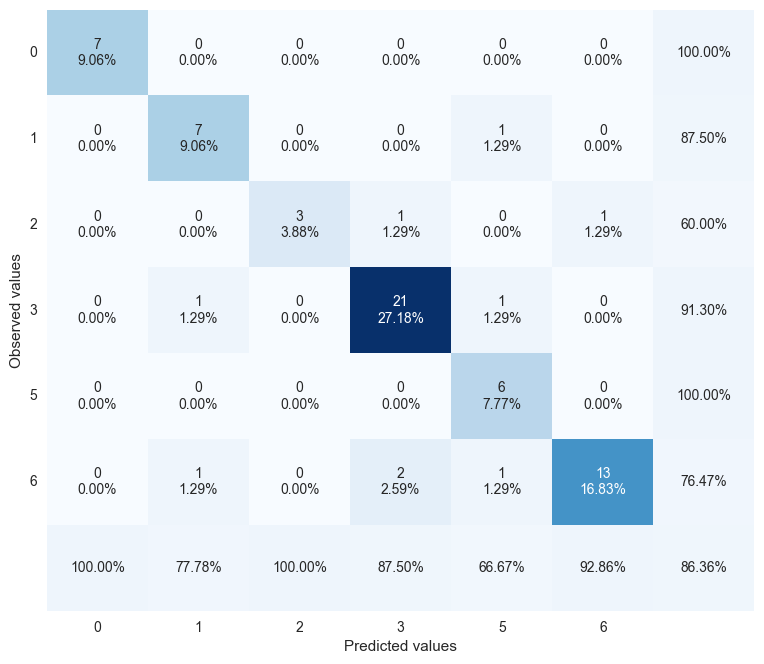

In [193]:
classifier.plot_confusion_matrix()

In [194]:
classifier.confusion_matrix(test=False)

Predicted values                               recall
                                 0     1     2     3     5     6       
Observed values 0             23.0   0.0   0.0   0.0   0.0   0.0    1.0
                1              0.0  39.0   0.0   0.0   0.0   0.0    1.0
                2              0.0   0.0  28.0   0.0   0.0   0.0    1.0
                3              0.0   0.0   0.0  78.0   0.0   0.0    1.0
                5              0.0   0.0   0.0   0.0  37.0   0.0    1.0
                6              0.0   0.0   0.0   0.0   0.0  58.0    1.0
precision                      1.0   1.0   1.0   1.0   1.0   1.0    1.0

In [195]:
classifier.classification_report()

,precision,recall,f1-score,support
0,1.000000,1.000000,1.000000,7.000000
1,0.777778,0.875000,0.823529,8.000000
2,1.000000,0.600000,0.750000,5.000000
3,0.875000,0.913043,0.893617,23.000000
4,0.666667,1.000000,0.800000,6.000000
5,0.928571,0.764706,0.838710,17.000000
accuracy,0.863636,0.863636,0.863636,0.863636
macro avg,0.874669,0.858792,0.850976,66.000000
weighted avg,0.880802,0.863636,0.862871,66.000000


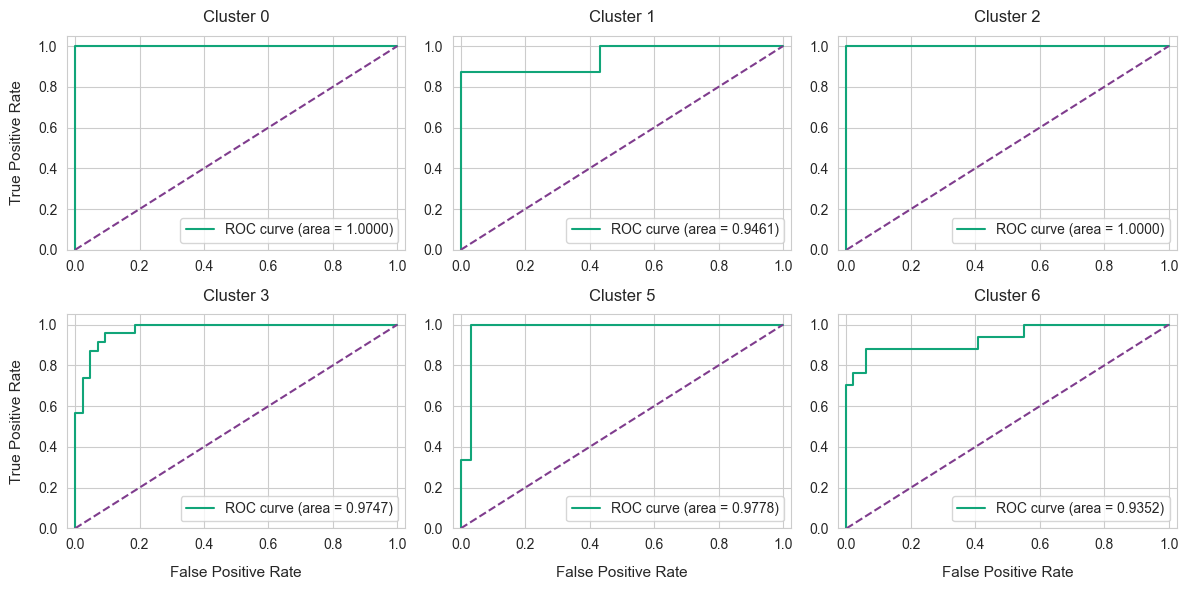

In [196]:
classifier.plot_roc_curves()

### 3.3. Model explainability 模型可解释性

#### 3.3.1. Global feature importance 全局特征重要性

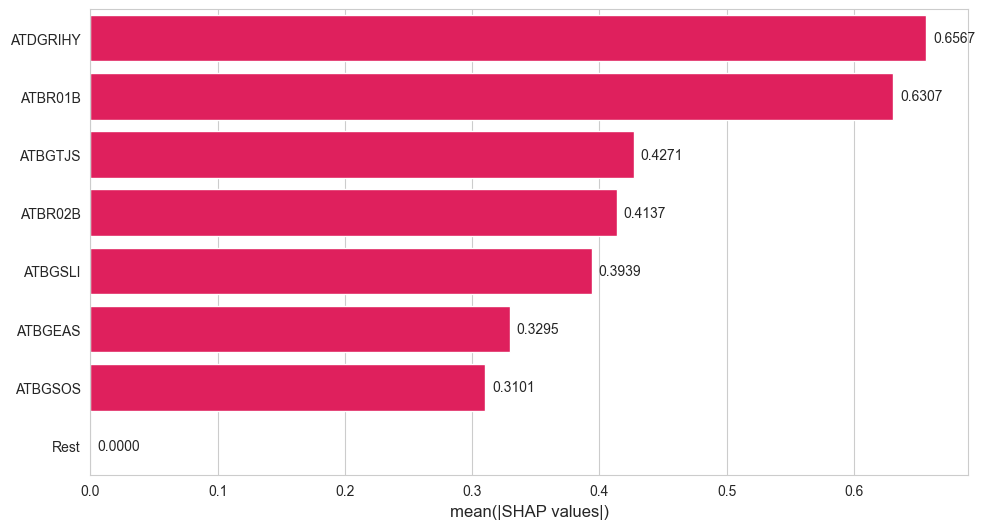

In [197]:
classifier.plot_shap_importances()

#### 3.3.2. Detailed feature importance by class (cluster label)

按类别（聚类标签）的详细特征重要性

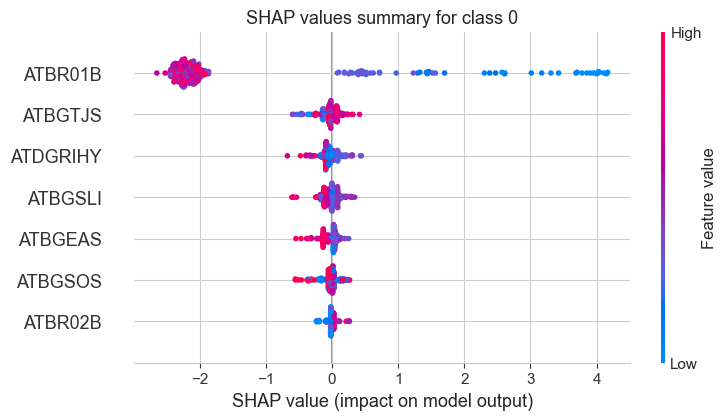

In [198]:
classifier.plot_shap_importances_beeswarm(class_id=0) #, output_path='PATH.jpg')

## Repreoducibility check 可重复性检查

In [199]:
final = classifier.df[classifier.filtered_features_ + ['cluster']].copy()
final['cluster_pred'] = classifier.model_.predict(classifier.df[classifier.filtered_features_])
final.to_csv('data2/ATG_modified_original_vars_classification_output.csv', index=False)

In [200]:
df_ref = pd.read_csv('data2/ATG_modified_original_vars_classification_output.csv')

print('Diff in dimension', np.abs(df_ref.shape[1] - final.shape[1]))
print('Diff in prediction', (df_ref['cluster_pred'] != final['cluster_pred']).sum())

Diff in dimension 0
Diff in prediction 0
